

# **STOCK MARKET ANALYSIS:**

This is my portfolio project. I'll be analyzing data from stock market, particularly market index(Nifty50 and Sensex). I'll be using
commonly used libraries in data science like `Numpy`, `Pandas`, `Matplotlib`, `Seaborn`, `Statsmodels` and `Sklearn`. I'll be importing stock information, visualize different aspects of it, and finally will look at a few ways of analyzing the risk of a stock, based on its previous performance history. I'll also be predicting future stock prices through a **Monte Carlo Method** <br><br>
I'll be answering the following questions along the way:
1. What was the change in price of the stock over time?
2. What was the daily return of the stock on average?
3. What was the moving average of the various stocks?
4. What was the correlation between different stocks' closing prices?
4. What was the correlation between different stocks' daily returns?
5. How much value do we put at risk by investing in a particular stock?
6. How can we attempt to predict future stock behavior?

First I'll be importing all the necessary libraries. I'm using ``Anaconda`` as my base terminal so those libaries have been pre-installed. For those using other terminal if it's your first time importing them you'll have to download them using `pip install <library name>` and restart your terminal.

In [72]:
import pandas as pd 
import numpy as np 
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_datareader.data as pdr
import statsmodels.api as sm
sns.set()
%matplotlib inline

Now I'll create a variable which will be holding the **start** and **end** time of the stock history which will be changing in **Real Time** so you don't have to change it every day.

In [73]:
end = datetime.now()
start= datetime(end.year-1,end.month,end.day)

Now I'll import historical data related to `Nifty50` and `Sensex` using **Yahoo Finance API**.

In [74]:
NSE = pdr.get_data_yahoo('^NSEI',start,end)
BSE = pdr.get_data_yahoo('^BSESN',start,end)

In [75]:
NSE.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-07-26,15893.349609,15797.000000,15849.299805,15824.450195,267100,15824.450195
2021-07-27,15881.549805,15701.000000,15860.500000,15746.450195,311000,15746.450195
2021-07-28,15767.500000,15513.450195,15761.549805,15709.400391,318600,15709.400391
2021-07-29,15817.349609,15737.799805,15762.700195,15778.450195,401600,15778.450195
2021-07-30,15862.799805,15744.849609,15800.599609,15763.049805,400000,15763.049805


In [76]:
BSE.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-07-26,53103.421875,52783.628906,52985.261719,52852.269531,20900,52852.269531
2021-07-27,53024.699219,52433.179688,52995.718750,52578.761719,6300,52578.761719
2021-07-28,52673.691406,51802.730469,52673.691406,52443.710938,8000,52443.710938
2021-07-29,52777.179688,52561.390625,52693.531250,52653.070312,8800,52653.070312
2021-07-30,52910.230469,52533.910156,52792.359375,52586.839844,9900,52586.839844


Here on I'll be performing **Exploratory Data Analysis** through graphs to get a better picture of the movement of stock over time.

In [77]:
NSE.describe()

,High,Low,Open,Close,Volume,Adj Close
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,17119.303391,16908.005184,17028.158199,17018.004996,298384.000000,17018.004996
std,755.766361,761.091953,768.160509,757.495073,85476.091587,757.495073
min,15382.500000,15183.400391,15272.650391,15293.500000,0.000000,15293.500000
25%,16488.637695,16288.512695,16383.299805,16376.112793,244850.000000,16376.112793
50%,17280.799805,17035.750000,17183.324219,17159.950195,280750.000000,17159.950195
75%,17693.687012,17480.024902,17610.249512,17600.674805,335950.000000,17600.674805
max,18604.449219,18445.300781,18602.349609,18477.050781,651600.000000,18477.050781


In [78]:
BSE.describe()

,High,Low,Open,Close,Volume,Adj Close
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,57379.562609,56665.463328,57080.051000,57033.383266,9370.000000,57033.383266
std,2552.650076,2568.516247,2598.153151,2556.878274,7284.501069,2556.878274
min,51652.828125,50921.218750,51181.988281,51360.421875,0.000000,51360.421875
25%,55372.072266,54549.173828,54916.034180,54886.617188,6400.000000,54886.617188
50%,57899.000000,56988.140625,57465.660156,57391.218750,7500.000000,57391.218750
75%,59313.819336,58603.482422,59087.631836,58995.094727,9500.000000,58995.094727
max,62245.429688,61624.648438,62156.480469,61765.589844,63800.000000,61765.589844


<AxesSubplot:xlabel='Date'>

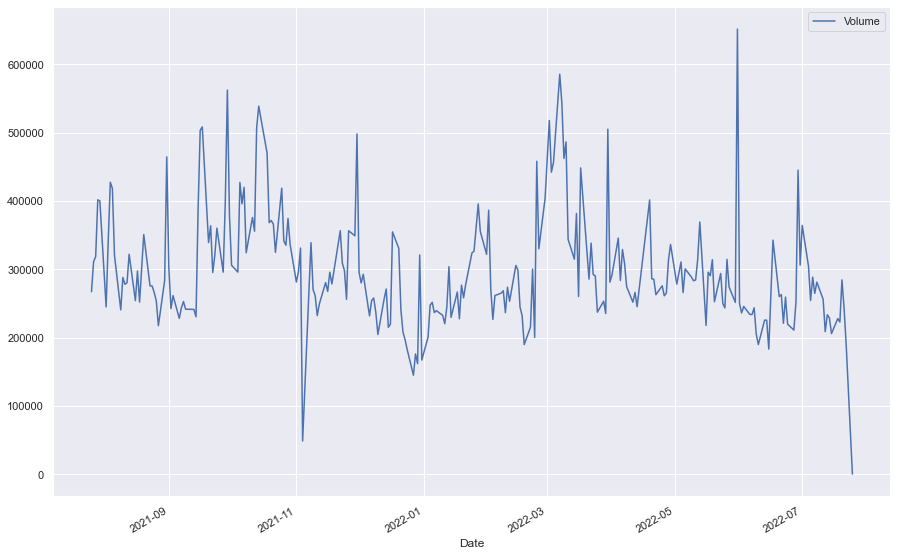

In [79]:
NSE['Volume'].plot(legend=True,figsize=(15,10))

<AxesSubplot:xlabel='Date'>

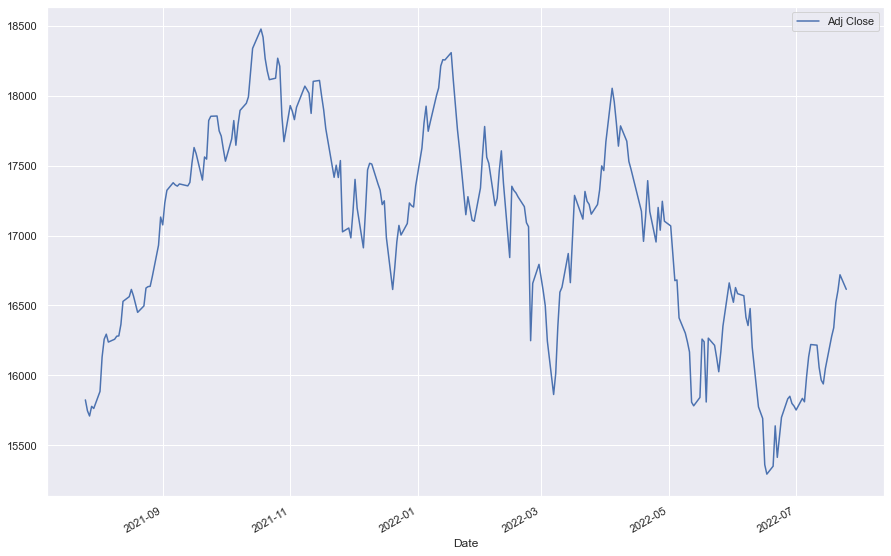

In [80]:
NSE['Adj Close'].plot(legend=True,figsize=(15,10))

<AxesSubplot:xlabel='Date'>

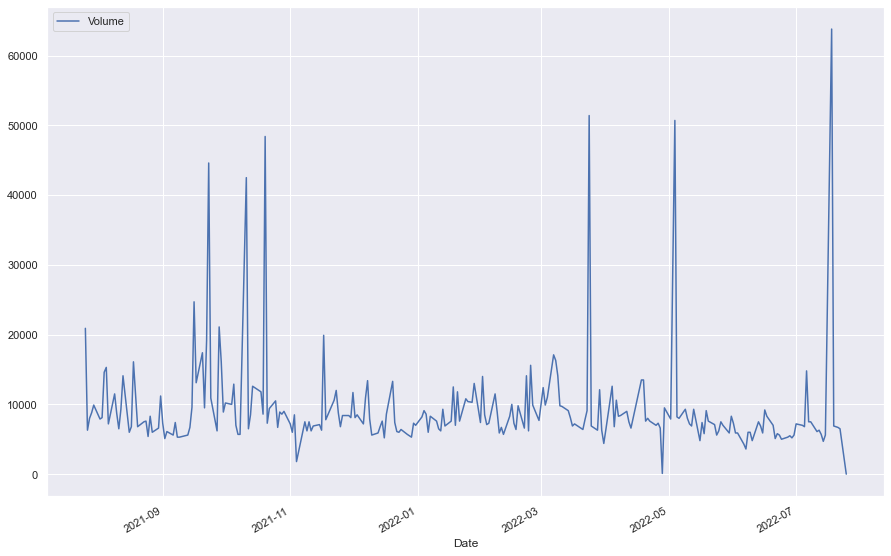

In [81]:
BSE['Volume'].plot(legend=True,figsize=(15,10))

<AxesSubplot:xlabel='Date'>

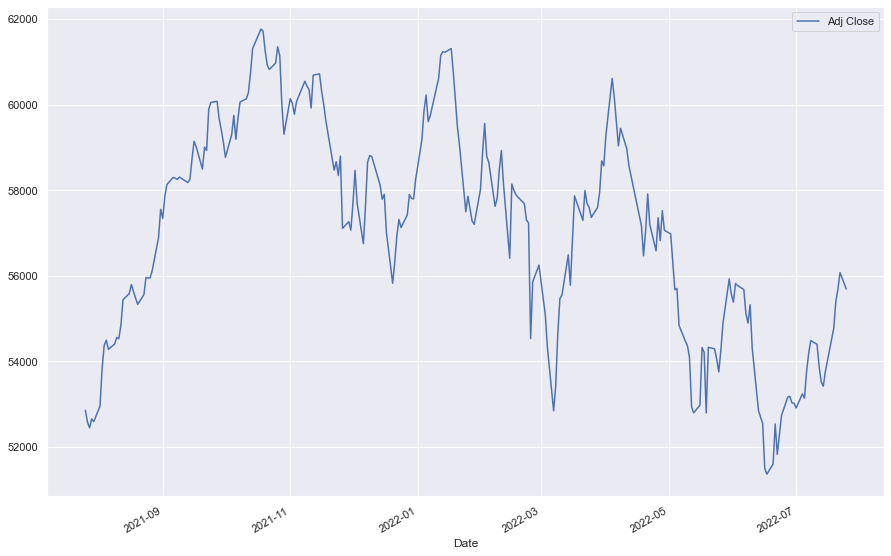

In [82]:
BSE['Adj Close'].plot(legend=True,figsize=(15,10))

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

For more info on the moving average check out the following links:

1. http://www.investopedia.com/terms/m/movingaverage.asp

2. http://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp

<AxesSubplot:xlabel='Date'>

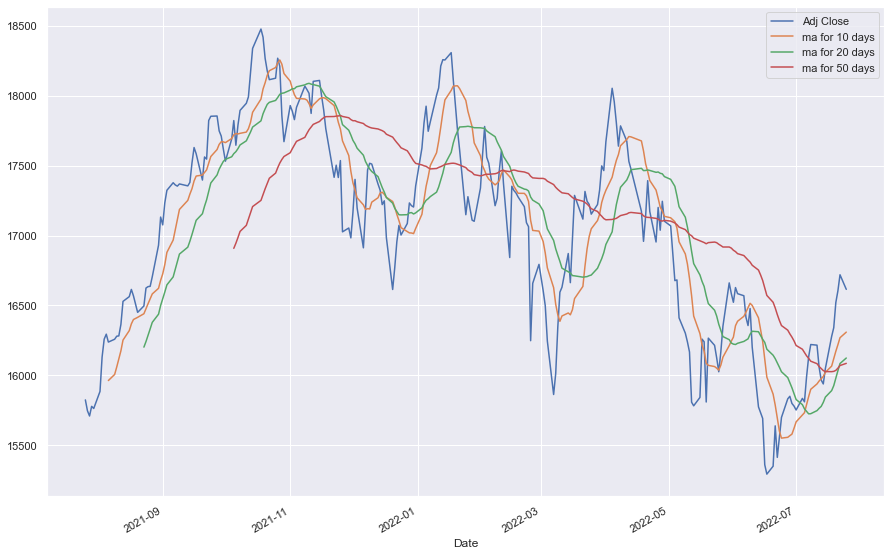

In [83]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = 'ma for %s days' %(str(ma))
    NSE[column_name] = NSE['Adj Close'].rolling(window = ma).mean()

NSE[['Adj Close','ma for 10 days','ma for 20 days','ma for 50 days']].plot(subplots=False,figsize=(15,10))

<AxesSubplot:xlabel='Date'>

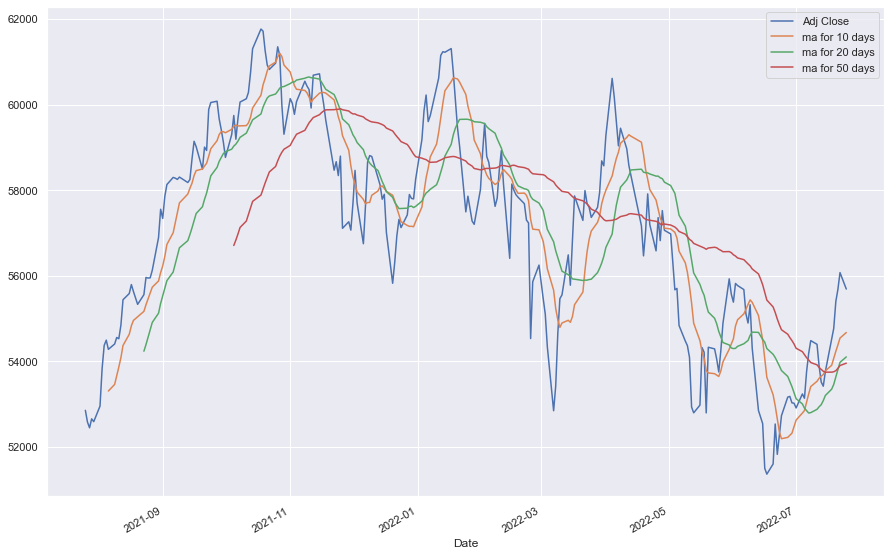

In [84]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = 'ma for %s days' %(str(ma))
    BSE[column_name] = BSE['Adj Close'].rolling(window = ma).mean()

BSE[['Adj Close','ma for 10 days','ma for 20 days','ma for 50 days']].plot(subplots=False,figsize=(15,10))

I'm now going to analyze the risk of the stock. In order to do so I'll need to take a closer look at the daily changes of the stock, and not just its absolute value. `Daily return` can be calculated by finding the percentage change in the `Adj Close` of each stock. we use the `.pct_change()` function to make it easier to calculate the values.  Let's go ahead and use pandas to retrieve the `Daily return` for the `NSE` and `BSE`.

<AxesSubplot:xlabel='Date'>

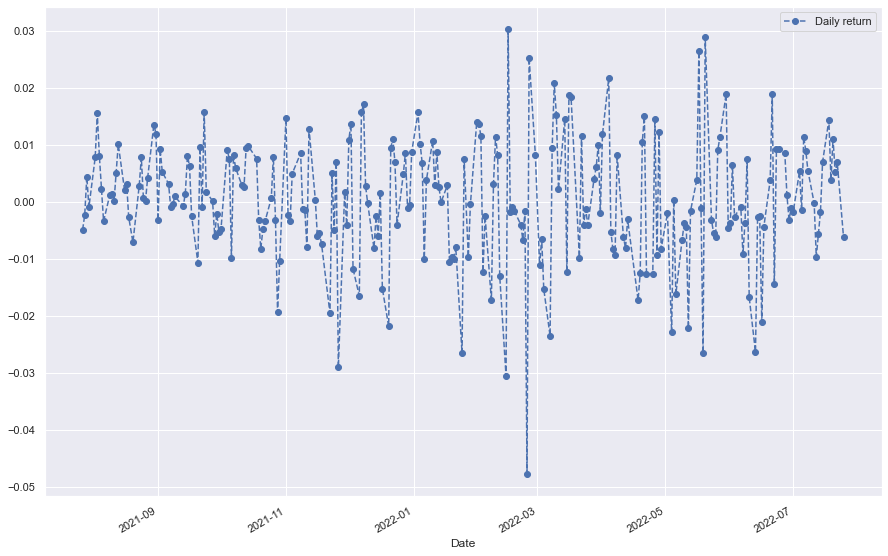

In [85]:
NSE['Daily return'] = NSE['Adj Close'].pct_change()
NSE['Daily return'].plot(figsize=(15,10),legend=True,marker='o',linestyle='--')

now let's get an overall look at the average daily return using a **Histogram**. I'll use `Seaborn` to create both a **Histogram** and **KDE Plot** on the same figure.

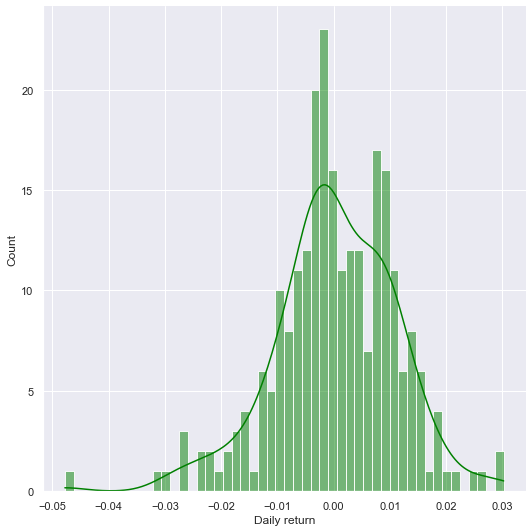

In [86]:
sns.displot(NSE['Daily return'],color = 'green',kind='hist',kde=True,height=7.5,bins=50)

I'll repeat the previous steps for `BSE` stock. 

<AxesSubplot:xlabel='Date'>

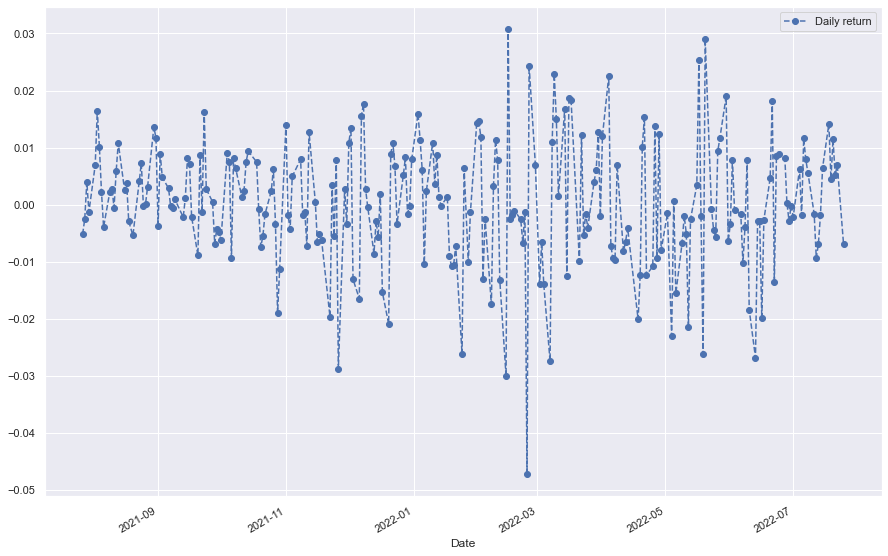

In [87]:
BSE['Daily return'] = BSE['Adj Close'].pct_change()
BSE['Daily return'].plot(figsize=(15,10),legend=True,marker='o',linestyle='--')

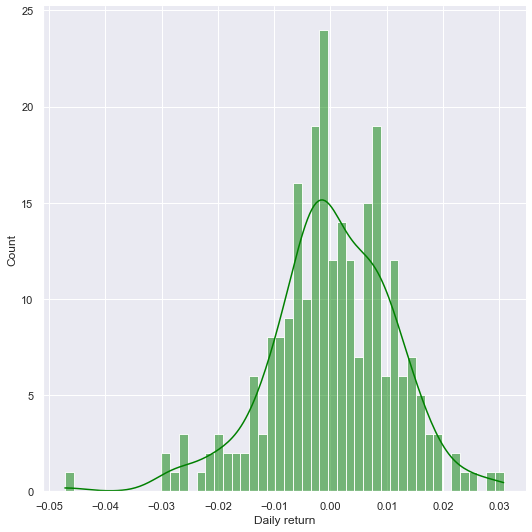

In [88]:
sns.displot(BSE['Daily return'],color = 'green',kind='hist',kde=True,height=7.5,bins=50)

Now we can compare the daily percentage return of two stocks to check how they are correlated. If two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. So let's go ahead and compare `NSE` and `BSE` stocks. I'll be using the **Joint Plot** from `Seaborn` library.

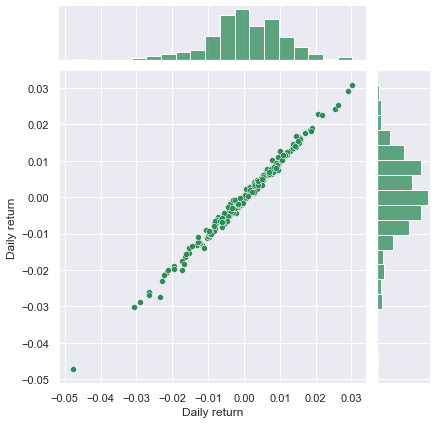

In [89]:
sns.jointplot(x=NSE['Daily return'],y=BSE['Daily return'],kind='scatter',color='seagreen')

Here I'm going to use diffrent kind of approach to find the co-relation between `NSE` and `BSE`. Firstly, I'll create a list containing the names of the indexes I'll be working on. Then, I'll import data through **Yahoo Finance API**. There after, I'll find the percentage change through `.pct_change()` function and pass those values as parameters for our **Joint Plot**.

c:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


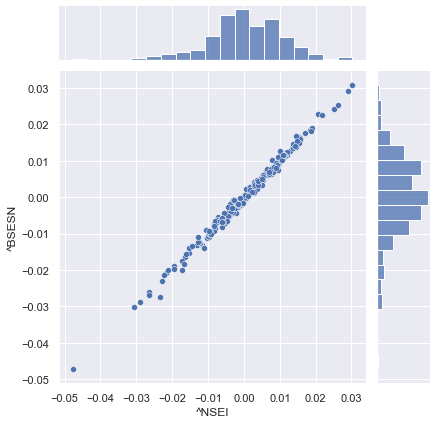

In [90]:
stocks_list = ['^NSEI','^BSESN']
closing_df = pdr.DataReader(stocks_list,'yahoo',start,end)['Adj Close']
stocks_rets = closing_df.pct_change()
sns.jointplot('^NSEI','^BSESN',stocks_rets,kind='scatter')

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our index stock ticker list. We can use `sns.pairplot()` to automatically create this plot.

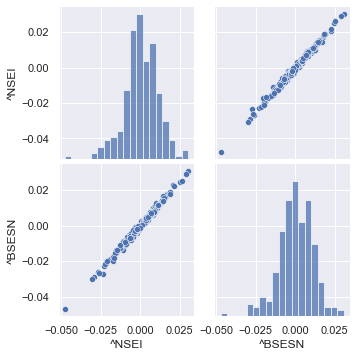

In [91]:
sns.pairplot(stocks_rets.dropna())

Above we can see all the relationships on `Daily return` between the stocks. A quick glance shows an interesting correlation between `NSE` and `BSE` daily returns. It might be interesting to investigate that individual comaprison. While the simplicity of just calling `sns.pairplot()` is fantastic we can also use `sns.PairGrid()` for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

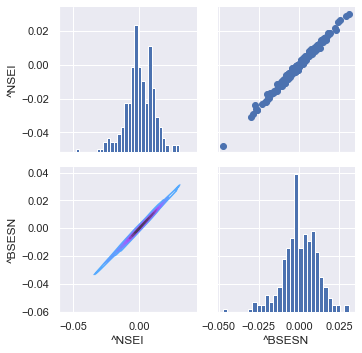

In [92]:
return_fig = sns.PairGrid(stocks_rets.dropna())

return_fig.map_upper(plt.scatter)
return_fig.map_lower(sns.kdeplot,cmap='cool_d')
return_fig.map_diag(plt.hist,bins=30)

We could have also analyzed the correlation of the closing prices using this exact same technique. Here it is shown, the code repeated from above with the exception of the parameter for `sns.PairGrid()` being `closing_df` instead of `stocks_rets`.

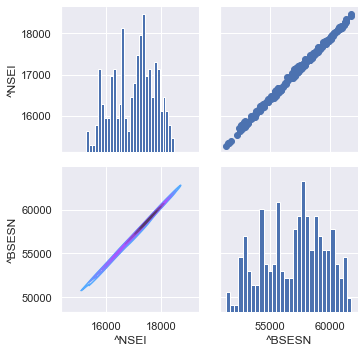

In [93]:
return_fig = sns.PairGrid(closing_df)

return_fig.map_upper(plt.scatter)
return_fig.map_lower(sns.kdeplot,cmap='cool_d')
return_fig.map_diag(plt.hist,bins=30)

Finally, we can also use `sns.heatmap()`  to get actual numerical values for the correlation between the stock's daily return values.

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

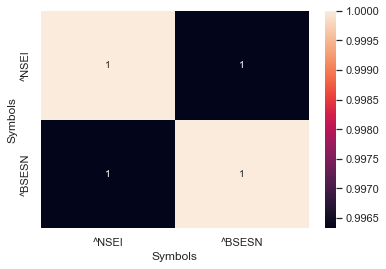

In [94]:
stocks_rets_corr = stocks_rets.dropna().corr()
sns.heatmap(stocks_rets_corr,annot=True)

By comparing the **closing prices**, we see an interesting relationship between `NSE` and `BSE`.

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

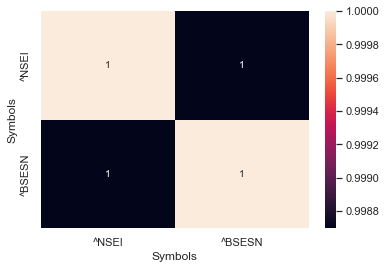

In [95]:
closing_df_corr = closing_df.corr()
sns.heatmap(closing_df_corr,annot=True)

## **Risk Analysis**
There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

In [96]:
rets = stocks_rets.dropna()
area = np.pi*20

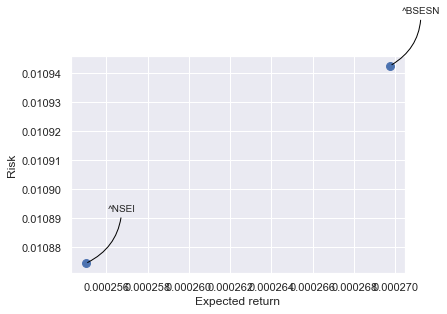

In [97]:
plt.scatter(rets.mean(),rets.std(),s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(label,xy=(x,y),xytext=(50,50),textcoords = 'offset points', ha ='right', va = 'bottom',
    arrowprops=dict(arrowstyle = '-',connectionstyle = 'arc3,rad=-0.3',color='black'))

### **Value at Risk**
Let's go ahead and define a value at risk parameter for our stocks. We can treat value at risk as ***the amount of money we could expect to lose (aka putting at risk) for a given confidence interval***. Theres several methods we can use for estimating a value at risk. Let's go ahead and see some of them in action.

### **Value at risk using the "bootstrap" method:**
For this method we will calculate the empirical quantiles from a histogram of `Daily return`. For more information on quantiles, check out this link: http://en.wikipedia.org/wiki/Quantile

Let's go ahead and repeat the `Daily return` histogram for `NSE` stock.

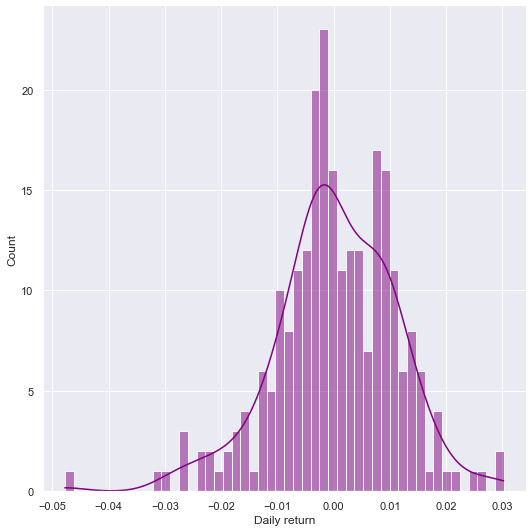

In [98]:
sns.displot(NSE['Daily return'],bins=50,color='purple',kde=True,height=7.5)

In [99]:
rets['^NSEI'].quantile(0.05).round(3)

-0.019

The 0.05 empirical quantile of daily returns is at -0.019. That means that with 95% confidence, our worst daily loss will not exceed 1.9%. If we have a 1 lakh rupee investment, our one-day 5% Value at Risk (VaR) is 0.019 * 1,00,000 = 19,00. I'll repead the same for `BSE` stock as well.


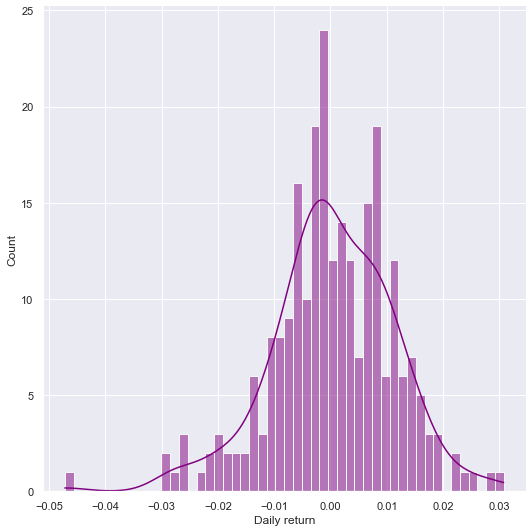

In [100]:
sns.displot(BSE['Daily return'],bins=50,color='purple',kde=True,height=7.5)

In [101]:
rets['^BSESN'].quantile(0.05).round(3)

-0.019

Our one-day 5% Value at Risk for `BSE` stock is similar to that of `NSE` i.e 1.9%.

## **Value at Risk using the Monte Carlo method**
Using the Monte Carlo method to run many trials with random market conditions, then I'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

Let's start with a brief explanation of what I'll be going to do:

We will use the `geometric Brownian motion` (GBM), which is technically known as a `Markov process`. This means ***that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements***.

>This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.

The equation for geometric Browninan motion is given by the following equation:

$$ \frac{ΔS}{S} = μΔt+σϵ\sqrtΔt $$
Where S is the stock price, mu is the expected return (which we calculated earlier),sigma is the standard deviation of the returns, t is time, and epsilon is the random variable.

We can mulitply both sides by the stock price (S) to rearrange the formula and solve for the stock price.

$$ ΔS=S(μΔt+σϵ\sqrtΔt) $$
Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as "drift", which is the average daily return multiplied by the change of time. The second term is known as "shock", for each time period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be.

For more info on the Monte Carlo method for stocks, check out the following link: http://www.investopedia.com/articles/07/montecarlo.asp

To execute the Monte Carlo method I'll using `^NSEI` from `rets` Dataframe.

In [102]:
days = 365

dt = 1/days

mu = rets.mean()['^NSEI']

sigma = rets.std()['^NSEI']

Next, I'll will create a function that takes in the starting price and number of days, and uses the sigma and mu we already calculated form out daily returns.

In [103]:
def stock_monte_carlo(start_price,days,mu,sigma):
    price = np.zeros(days)
    price[0] = start_price  

    shock = np.zeros(days)
    drift = np.zeros(days)

    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu*dt,scale= sigma*np.sqrt(dt))

        drift[x] = mu*dt

        price[x] = price[x-1] + (price[x-1]*(drift[x]+shock[x]))
    return price 

Now! let's make the function work.

Text(0.5, 1.0, 'Monte Carlo Analysis for Nifty50 Stock')

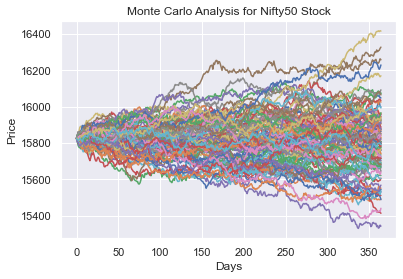

In [104]:
start_price = NSE['Adj Close'][0] 
for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Nifty50 Stock')

Let's go ahead and get a histogram of the end results for a much larger run.

In [105]:
runs = 10000
stimulations = np.zeros(runs)
for run in range(runs):
    stimulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Now that we have our array of simulations, we can go ahead and plot a histogram , as well as use qunatile to define our risk for this stock.

For more info on quantiles, check out this link: http://en.wikipedia.org/wiki/Quantile

Text(0.5, 1.0, 'Final price distribution for Nifty50 Stock after 365 days')

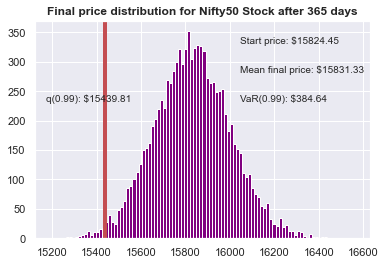

In [106]:
q = np.percentile(stimulations,1)
plt.hist(stimulations,bins=100,color='purple',histtype='bar')

plt.figtext(0.6,0.8,s='Start price: $%.2f' %start_price)

plt.figtext(0.6,0.7,'Mean final price: $%.2f' %stimulations.mean())

plt.figtext(0.6,0.6,'VaR(0.99): $%.2f' %(start_price-q,))

plt.figtext(0.15,0.6,'q(0.99): $%.2f'%q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u'Final price distribution for Nifty50 Stock after %s days'%days, weight='bold')

Awesome! Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the `NSE` stock, which looks to be rs.384.88 for every investment of rs.15824.45 (the price of one inital `NSE` stock).

This basically means for every initial stock you purchase your putting about rs.384.88 at risk 99% of the time from our Monte Carlo Simulation.

Note: This values my change as this project runs on realtime.


## **Linear Regression**

Linear regression uses the relationship between the data-points to draw a straight line through all them. This line can be used to predict future values. Python has methods for finding a relationship between data-points and to draw a line of linear regression. We will show you how to use these methods instead of going through the mathematic formula.

#### **Method - I**

Here we'll be using `statsmodel.api` library to perform regression analysis and try predicting values by training the data and defining relationship. Following is the formula for the linear regression:
$$  y_i = {\beta_1 x}+{\beta_0}  $$
where,<br>
$y_i$ is the predicted (dependent) variable.<br>
$\beta_1$ is the slope.<br>
$x$ is perdictor (independent) variable.<br>
$\beta_0$ is the intercept.<br>

In [107]:
x1 = rets['^NSEI']
y = rets['^BSESN']
# Add a constant. Essentially, we are adding a new column (equal in lenght to x), which consists only of 1s
x = sm.add_constant(x1)
# Fit the model, according to the OLS (ordinary least squares) method with a dependent variable y and an idependent x
result = sm.OLS(y,x).fit()
# Print a nice summary of the regression. That's one of the strong points of statsmodels -> the summaries
result.summary()

c:\Users\asus\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 ^BSESN   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 3.341e+04
Date:                Mon, 25 Jul 2022   Prob (F-statistic):          1.28e-265
Time:                        10:39:49   Log-Likelihood:                 1383.3
No. Observations:                 249   AIC:                            -2763.
Df Residuals:                     247   BIC:                            -2756.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.409e-05   5.95e-05      0.237      0.813      -0.000       0.000
^NSEI          1.0026      0.005    182.790      0.000       0.992       1.013
==============================================================================
Omnibus:                        9.967   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               19.364
Skew:                          -0.100   Prob(JB):                     6.24e-05
Kurtosis:                       4.352   Cond. No.                         92.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

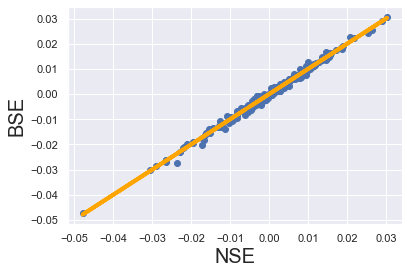

In [108]:
# Create a scatter plot
plt.scatter(x1,y)
# Define the regression equation, so we can plot it later
y_hat= 1.0020*x1 + 1.878e-05
# Plot the regression line against the independent variable (SAT)
fig = plt.plot(x1,y_hat,lw=4,c='orange',label='Regression Line')
# Label the axes
plt.xlabel('NSE', fontsize = 20)
plt.ylabel('BSE', fontsize = 20)
plt.show()


### **Method - II**

Here we're going to use `sklearn` library to perform regression analysis and try predicting the values just like we did before with `statsmodel` library.

link for documentaion on `sklearn`: https://scikit-learn.org/stable/index. \
Documentation on regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [109]:
#In order to feed x to sklearn, it should be a 2D array (a matrix)
# Therefore, we must reshape it 
# Note that this will not be needed when we've got more than 1 feature (as the inputs will be a 2D array by default)
x1_matrix = x1.values.reshape(-1,1)
# Check the shape just in case
x1_matrix.shape

(249, 1)

In [110]:
# We start by creating a linear regression object
reg = LinearRegression()
# The whole learning process boils down to fitting the regression
# Note that the first argument is the independent variable, while the second - the dependent (unlike with StatsModels)
reg.fit(x1_matrix,y)

LinearRegression()

In [111]:
# To get the R-squared in sklearn we must call the appropriate method
reg.score(x1_matrix,y)

0.9926617316502228

In [112]:
# Getting the coefficients of the regression
# Note that the output is an array, as we usually expect several coefficients
reg.coef_

array([1.00257022])

In [113]:
# Getting the intercept of the regression
# Note that the result is a float as we usually expect a single value
reg.intercept_

1.4089071701790291e-05

In [114]:
# There is a dedicated method should we want to predict values
# Note that the result is an array, as we can predict more than one value at a time
reg.predict([[15000]])

array([15038.55333463])

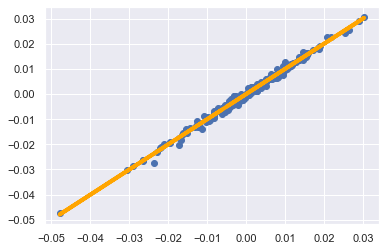

In [115]:
# There are different ways to plot the data - here's the matplotlib code
plt.scatter(x1,y)
# Parametrized version of the regression line
yhat = reg.coef_*x1_matrix+reg.intercept_
# Plotting the regression line
fig = plt.plot(x1,yhat,lw=4,c='orange',label='Regression Line')


## **Multiple Linear Regression**

Multiple linear regression (MLR), also known simply as multiple regression, is a statistical technique that uses several explanatory variables to predict the outcome of a response variable. Following is the formula for MLR:
$$ \hat y = {\beta_0} + {\beta_1 x_{i1}} + {\beta_2 x_{i2}} + ... + {\beta_p x_{ip}}$$

Where, for $ i = n $ obervations, \
$\hat y$ = dependent variable. \
$x_i$ = explanatory variables. \
$β_0$ = y-intercept (constant term). \
$β_p$ = slope coefficients for each explanatory variable.

For more information: https://www.investopedia.com/terms/m/mlr.asp#:~:text=Key%20Takeaways-,Multiple%20linear%20regression%20(MLR)%2C%20also%20known%20simply%20as%20multiple,uses%20just%20one%20explanatory%20variable.

In [116]:
# There are two independent variables: 'Adj Close' and 'Volume' of NSE.
x = NSE[['Adj Close','Volume']]
# and a single depended variable: 'Adj Close' of BSE.
y = BSE['Adj Close']

In [117]:
# The whole learning process boils down to fitting the regression
reg.fit(x,y)

LinearRegression()

In [118]:
# Getting the coefficients of the regression
reg.coef_

array([ 3.37334736e+00, -3.07776293e-04])

In [119]:
# Getting the intercept of the regression
reg.intercept_

-282.4234858491036

In [120]:
# Get the R-squared of the regression
reg.score(x,y)

0.9974980316334355

### Formula for Adjusted R^2

$R^2_{adj.} = 1 - (1-R^2)*\frac{n-1}{n-p-1}$

In [121]:
# If we want to find the Adjusted R-squared we can do so by knowing the r2, the # observations, the # features
r2 = reg.score(x,y)
# Number of observations is the shape along axis 0
n = x.shape[0]
# Number of features (predictors, p) is the shape along axis 1
p= x.shape[1]
# We find the Adjusted R-squared using the formula
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adj_r2

0.997477772780265

## **Feature selection**
SkLearn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html

In [130]:
# We will look into: f_regression
# f_regression finds the F-statistics for the *simple* regressions created with each of the independent variables
# The limitation of this approach is that it does not take into account the mutual effect of the two features
f_regression(x,y)
# Since we are more interested in the latter (p-values), we can just take the second array
p_values = f_regression(x,y)[1]
# To be able to quickly evaluate them, we can round the result to 3 digits after the dot
p_values.round(3)

array([0.   , 0.376])

In [131]:
# Let's create a new data frame with the names of the features
# Then we create and fill a second column, called 'Coefficients' with the coefficients of the regression
reg_summary = pd.DataFrame(data=x.columns.values,columns=['Features'])
reg_summary['Coefficient'] = reg.coef_
reg_summary['p-value'] = p_values.round(3)
reg_summary['R-sqr'] = reg.score(x,y)
reg_summary['Adj R-sqr'] = adj_r2
reg_summary

,Features,Coefficient,p-value,R-sqr,Adj R-sqr
0,Adj Close,2550.178297,0.000,-1.955029e+08,0.997478
1,Volume,-26.254847,0.376,-1.955029e+08,0.997478


## Standardization
SkLearn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [136]:
# Create a StandardScaler instance
scaler = StandardScaler()
# Fit the input data (x)
# Essentially we are calculating the mean and standard deviation feature-wise 
scaler.fit(x)
# The actual scaling of the data is done through the method 'transform()'
# Let's store it in a new variable, named appropriately
x_scaled = scaler.transform(x)
# The result is an ndarray
x_scaled
# We just need to specify that our inputs are the 'scaled inputs'
reg.fit(x_scaled,y)

LinearRegression()

In [126]:
# Let's see the coefficients
reg.coef_

array([2550.17829667,  -26.25484687])

In [127]:
# And the intercept
reg.intercept_

57033.383265625

In [137]:
# As usual we can try to arrange the information in a summary table
# Let's create a new data frame with the names of the features
reg_summary2 = pd.DataFrame(['Bias','Adj Close','Volume'], columns=['FEATURES'])
# Then we create and fill a second column, called 'Weights' with the coefficients of the regression
# Since the standardized coefficients are called 'weights' in ML, this is a much better word choice for our case
# Note that even non-standardized coeff. are called 'weights' 
# but more often than not, when doing ML we perform some sort of scaling
reg_summary2['Weights'] = reg.intercept_,reg.coef_[0],reg.coef_[1]
# Now we have a pretty clean summary, which can help us make an informed decision about the importance of each feature
reg_summary2

,FEATURES,Weights
0,Bias,57033.383266
1,Adj Close,2550.178297
2,Volume,-26.254847



### **PREDICTION**


In [129]:
# Finally we make a prediction using the scaled new data
reg.predict(x_scaled).round()

array([53017., 52740., 52613., 52820., 52769., 53228., 54027., 54433.,
       54556., 54396., 54488., 54547., 54558., 54834., 55377., 55512.,
       55673., 55533., 55103., 55281., 55713., 55750., 55762., 56003.,
       56745., 57368., 57229., 57780., 58076., 58269., 58211., 58179.,
       58236., 58189., 58275., 58697., 59033., 58882., 58299., 58848.,
       58818., 59742., 59832., 59858., 59467., 59291., 59033., 58765.,
       59305., 59707., 59122., 59601., 59985., 60140., 60301., 60828.,
       61414., 61902., 61737., 61223., 60926., 60725., 60732., 61238.,
       61046., 59841., 59227., 60114., 59972., 59760., 60142., 60565.,
       60504., 60415., 59940., 60708., 60721., 60353., 60005., 59559.,
       58360., 58667., 58373., 58795., 57044., 57139., 56855., 57537.,
       58333., 57638., 56697., 57582., 58570., 58735., 58726., 58228.,
       58077., 57745., 57835., 56905., 55661., 56217., 56850., 57249.,
       57021., 57311., 57797., 57735., 57654., 58207., 59113., 59705.,
      

# THANK YOU FOR READING SO FAR!!! :)
